# Music 255 Lab 5: Charts, Plots and Networks
by Aman Hamdard

October 13th, 2024

## 0. Import Libraries

Here I imported the essential libraries for this assignment, most importantly 
```python
plotly.express as px
```
which gives us the ability to create the charts and graphs we want for this lab:

In [27]:
# import libraries
from community import community_louvain
from copy import deepcopy
from IPython.display import SVG
import altair as alt
import glob as glob
import numpy as np
import os
import pandas as pd
import re
import networkx as nx
import plotly.express as px
import requests

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotify_tools


from pyvis import network as net
import networkx as nx
from community import community_louvain
from itertools import combinations
from copy import deepcopy

# setup plotting for quarto
alt.renderers.enable('default')
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

# supress warnings
import warnings
warnings.filterwarnings('ignore')


# 1. Motivation 

This week in class, we learned more about how to visually represent discoveries made through uncovering certain aspects of our data by using plotly express to create charts, plots and networks. Additionally, we made thematic/cover playlists in hopes of seeing how the songs on each of these playslists compare according to Spotify's metrics.

One theme that has been persistent that I've noticed throughout our readings of Nick Seaver's *Computing Taste* is that although music platforms such as Spotify are able to quantify certain features for each song, their methods of doing so are ambiguous. Furthermore, I personally feel like their metrics are flawed once you compare what Spotify's measured to what you personally hear or listen to in a song. 

For this lab, I chose to take the Macro-to-micro approach to observe different trends within the data of my playlists specifically. This means I started with organizing the spotify playlists list to only get my own playlists, found the correlation matrix for all the songs on my playlists, and decided to dive in on specific things, such as the scatter plots and radar plots from there.

# 2. Implementation

In order to get the results I wanted, I did the following steps: 

2A. I read in the pickle file to get the `full list` of songs from all our thematic playlists. Then, I organized the thematic playlists's columns to get rid of some categories such as `type`, `uri` and `id`, which weren't measurable 
features of the songs, creating the `thematic short` dataframe. 

2B. I cerated a new datframe `me` to include only the playlists I made, and then made smaller dataframes `bob`, `keef` and `covers` based on my thematic playlists. Using syntax like:
```python
thematic_short['playlist_title'].str.contains('hamdard') AND THEN me['playlist_title'].str.contains('dylan')
```
and so forth, I was able to make 3 separate dataframes from the larger one containing all my playlists. I also edited the `track_title` column so that each song contained the song title as well as the artists to see the difference between all the versions of *And I Love Her/Him*. 

2C. Then I started working with the plotly.express features to create a correlation matrix for all my datasets and see what features had the strongest correlations. 

2D. I then looked at the correlation plots of many feautres regarding my `me` dataframe, then decided to look more into the `mode` feature since it split the songs into two categories based on what songs had a major or minor key. I inquired what the `valence` and `mode` correlation plot would look like, and it helped me see some of the flaws and uncertainties I have regarding Spotify's measures of these qualities. 

2E. Finally I broke up my `me` dataframe into two smaller datasets: `mode_0` and `mode_1` for the two mode categories, and compared their radar charts for how they compared for other Spotify audio features. 

The commented code and markdown cells for each of these appears in the cells below.

### 2A. Organizing thematic playlists:

First read in the pickle file with all the songs and their playlists:

In [28]:
full_list  = pd.read_pickle('thematic_spotify.pkl')
full_list.reset_index(drop=True, inplace=True)
full_list

,track_id,track_title,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist_title
0,5gQ0LTbcX7gpQDg39gNLH8,Metal Militia (Remastered),Metallica,0.166,0.956,9,-5.307,1,0.1450,0.000081,...,0.238,176.217,audio_features,5gQ0LTbcX7gpQDg39gNLH8,spotify:track:5gQ0LTbcX7gpQDg39gNLH8,https://api.spotify.com/v1/tracks/5gQ0LTbcX7gp...,https://api.spotify.com/v1/audio-analysis/5gQ0...,311467,4,hamdard_for_bob_dylan
1,1Sgj10byiGzPpI2IrXSFEn,Protect Ya Neck,Wu-Tang Clan,0.822,0.509,8,-12.310,0,0.4150,0.035300,...,0.823,102.007,audio_features,1Sgj10byiGzPpI2IrXSFEn,spotify:track:1Sgj10byiGzPpI2IrXSFEn,https://api.spotify.com/v1/tracks/1Sgj10byiGzP...,https://api.spotify.com/v1/audio-analysis/1Sgj...,291267,4,hamdard_for_bob_dylan
2,2ttqSLZsmB07QKzn1acXcm,The Blond-O-Sonic Shimmer Trap,Arctic Monkeys,0.502,0.852,2,-4.173,0,0.0399,0.160000,...,0.714,125.052,audio_features,2ttqSLZsmB07QKzn1acXcm,spotify:track:2ttqSLZsmB07QKzn1acXcm,https://api.spotify.com/v1/tracks/2ttqSLZsmB07...,https://api.spotify.com/v1/audio-analysis/2ttq...,204827,4,hamdard_for_bob_dylan
3,4UF1eupXP9Zz5GpYepyOxI,Razorblade,The Strokes,0.394,0.859,9,-3.851,1,0.0409,0.002010,...,0.511,136.075,audio_features,4UF1eupXP9Zz5GpYepyOxI,spotify:track:4UF1eupXP9Zz5GpYepyOxI,https://api.spotify.com/v1/tracks/4UF1eupXP9Zz...,https://api.spotify.com/v1/audio-analysis/4UF1...,208133,5,hamdard_for_bob_dylan
4,6or1bKJiZ06IlK0vFvY75k,Rap God,Eminem,0.709,0.843,7,-2.660,1,0.3140,0.395000,...,0.625,148.134,audio_features,6or1bKJiZ06IlK0vFvY75k,spotify:track:6or1bKJiZ06IlK0vFvY75k,https://api.spotify.com/v1/tracks/6or1bKJiZ06I...,https://api.spotify.com/v1/audio-analysis/6or1...,363521,4,hamdard_for_bob_dylan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,7tf64lNC31lWlTsih0nfZf,Good Vibrations,The Beach Boys,0.371,0.424,10,-9.497,1,0.0411,0.332000,...,0.325,151.621,audio_features,7tf64lNC31lWlTsih0nfZf,spotify:track:7tf64lNC31lWlTsih0nfZf,https://api.spotify.com/v1/tracks/7tf64lNC31lW...,https://api.spotify.com/v1/audio-analysis/7tf6...,215827,4,jain_dog_on_the_move
416,1jDJFeK9x3OZboIAHsY9k2,I'm Still Standing,Elton John,0.505,0.904,6,-6.863,1,0.1790,0.355000,...,0.773,176.811,audio_features,1jDJFeK9x3OZboIAHsY9k2,spotify:track:1jDJFeK9x3OZboIAHsY9k2,https://api.spotify.com/v1/tracks/1jDJFeK9x3OZ...,https://api.spotify.com/v1/audio-analysis/1jDJ...,183440,4,jain_dog_on_the_move
417,4o6BgsqLIBViaGVbx5rbRk,You Make My Dreams (Come True),Daryl Hall & John Oates,0.751,0.501,5,-12.151,1,0.0551,0.234000,...,0.902,167.057,audio_features,4o6BgsqLIBViaGVbx5rbRk,spotify:track:4o6BgsqLIBViaGVbx5rbRk,https://api.spotify.com/v1/tracks/4o6BgsqLIBVi...,https://api.spotify.com/v1/audio-analysis/4o6B...,190627,4,jain_dog_on_the_move
418,0ikz6tENMONtK6qGkOrU3c,Wake Me Up Before You Go-Go,Wham!,0.620,0.573,0,-11.893,1,0.0423,0.271000,...,0.897,81.548,audio_features,0ikz6tENMONtK6qGkOrU3c,spotify:track:0ikz6tENMONtK6qGkOrU3c,https://api.spotify.com/v1/tracks/0ikz6tENMONt...,https://api.spotify.com/v1/audio-analysis/0ikz...,231333,4,jain_dog_on_the_move


In a new dataframe called `thematic_short`, we rename and reorder the columns through a new list called `col_list` so that we get rid of columns unrelated to Spotify's metrics, and see `playlist_title` first. Coincidentally, the first 3 songs are from one of my playlists:

In [29]:
col_list = ['playlist_title', 'track_title', 'artist_name', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

thematic_short = full_list[col_list]
thematic_short.head(3)

,playlist_title,track_title,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,hamdard_for_bob_dylan,Metal Militia (Remastered),Metallica,0.166,0.956,9,-5.307,1,0.1450,0.000081,0.005150,0.118,0.238,176.217
1,hamdard_for_bob_dylan,Protect Ya Neck,Wu-Tang Clan,0.822,0.509,8,-12.310,0,0.4150,0.035300,0.000007,0.771,0.823,102.007
2,hamdard_for_bob_dylan,The Blond-O-Sonic Shimmer Trap,Arctic Monkeys,0.502,0.852,2,-4.173,0,0.0399,0.160000,0.011300,0.151,0.714,125.052


Seeing all of the playlist titles in list form so that I can see the names of mine, and figure out how to isolate them:

In [30]:
thematic_short['playlist_title'].unique().tolist()

['hamdard_for_bob_dylan',
 'hamdard_for_keith_richards',
 'mccombs_headphone_girl',
 'mccombs_person_fall_in_love',
 'mccombs_my_room',
 'kogawara_interns_commute',
 'kogawara_barista_at_work',
 'kogawara_summer_teen',
 'hamdard_beatles_covers',
 'kogawara_let_it_snow_covers',
 'cross_encoding_music_student_working',
 'cross_fantasy_novel_fan',
 'cross_la_vie_en_rose_covers',
 'starkey_discordant_electronica',
 'tan_chem_first_year_homework',
 'starkey_jazz_fan_in_motion',
 'starkey_teen_spirit_covers',
 'kohn_headbangers_rage',
 'kohn_a_good_cry',
 'kohn_such_great_heights_covers',
 'tan_haverford_gym_rat',
 'tan_chopin_ballade_renditions',
 'shigeno_film_scores_at_work',
 'shigeno_classic_roadtrip',
 'shigeno_grieg_mountain_king_renditions',
 'helmreich_stuffed_raccoon_melancholia',
 'helmreich_stuffed_sloth_clubbing',
 'helmreich_stones_satisfaction_covers',
 'mccombs_cant_take_eyes_covers',
 'hamdard_and_i_love_her_covers',
 'keim_covers',
 'keim_headphone_solo',
 'keim_stuck_in_90

### 2B. Creating personal dataframes `me`, `bob`, `keef` and `covers`:

I saw from the list above that all my playlists included my last name, so I used the syntax
```python
thematic_short['playlist_title'].str.contains('hamdard')]
```
to get a new dataframe `me` that only inlcluded the songs I contributed to the `thematic_short` playlist.

In [31]:
me = thematic_short[thematic_short['playlist_title'].str.contains('hamdard')].reset_index(drop=True)
me.head(15)

,playlist_title,track_title,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,hamdard_for_bob_dylan,Metal Militia (Remastered),Metallica,0.166,0.956,9,-5.307,1,0.1450,0.000081,0.005150,0.1180,0.238,176.217
1,hamdard_for_bob_dylan,Protect Ya Neck,Wu-Tang Clan,0.822,0.509,8,-12.310,0,0.4150,0.035300,0.000007,0.7710,0.823,102.007
2,hamdard_for_bob_dylan,The Blond-O-Sonic Shimmer Trap,Arctic Monkeys,0.502,0.852,2,-4.173,0,0.0399,0.160000,0.011300,0.1510,0.714,125.052
3,hamdard_for_bob_dylan,Razorblade,The Strokes,0.394,0.859,9,-3.851,1,0.0409,0.002010,0.233000,0.1000,0.511,136.075
4,hamdard_for_bob_dylan,Rap God,Eminem,0.709,0.843,7,-2.660,1,0.3140,0.395000,0.000000,0.7990,0.625,148.134
5,hamdard_for_bob_dylan,My Doorbell,The White Stripes,0.614,0.663,8,-9.965,1,0.0352,0.290000,0.006820,0.0986,0.823,97.083
6,hamdard_for_bob_dylan,Suzanne,Leonard Cohen,0.409,0.172,6,-16.440,0,0.0389,0.922000,0.001120,0.1110,0.352,132.151
7,hamdard_for_bob_dylan,Figure It Out,Royal Blood,0.658,0.814,0,-4.631,1,0.0559,0.229000,0.006530,0.2160,0.691,108.018
8,hamdard_for_bob_dylan,Red Right Hand,Nick Cave & The Bad Seeds,0.735,0.403,4,-11.599,0,0.0370,0.139000,0.473000,0.1070,0.453,115.658
9,hamdard_for_bob_dylan,Diamonds And Rust,Joan Baez,0.506,0.343,5,-12.153,0,0.0300,0.243000,0.000000,0.1410,0.265,130.052


From here, I separated my `me` dataframe using the same notation with `str.contains()` to get songs from each of my four playlsits into three categories.

First I made my `bob` dataframe by using 
```python
str.contains('dylan')
```
to get songs only from my "for bob dylan" playlist:

In [32]:
bob = me[me['playlist_title'].str.contains('dylan')].reset_index(drop=True)
bob.head(3)

,playlist_title,track_title,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,hamdard_for_bob_dylan,Metal Militia (Remastered),Metallica,0.166,0.956,9,-5.307,1,0.1450,0.000081,0.005150,0.118,0.238,176.217
1,hamdard_for_bob_dylan,Protect Ya Neck,Wu-Tang Clan,0.822,0.509,8,-12.310,0,0.4150,0.035300,0.000007,0.771,0.823,102.007
2,hamdard_for_bob_dylan,The Blond-O-Sonic Shimmer Trap,Arctic Monkeys,0.502,0.852,2,-4.173,0,0.0399,0.160000,0.011300,0.151,0.714,125.052


I did the same by making my `keef` dataframe by using 
```python
str.contains('richards')
```
to get songs only from my "for keith richards" playlist:

In [33]:
keef = me[me['playlist_title'].str.contains('richards')].reset_index(drop=True)
keef.head(3)

,playlist_title,track_title,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,hamdard_for_keith_richards,Ramble On - 1990 Remaster,Led Zeppelin,0.468,0.607,9,-11.367,1,0.0336,0.0720,0.000852,0.225,0.886,98.429
1,hamdard_for_keith_richards,Black Sabbath - 2014 Remaster,Black Sabbath,0.317,0.431,2,-14.338,1,0.0415,0.0467,0.045700,0.239,0.133,132.652
2,hamdard_for_keith_richards,A Day In The Life - Remastered 2009,The Beatles,0.364,0.457,4,-14.162,0,0.0675,0.2900,0.000106,0.922,0.175,163.219


And finally I grouped all my cover songs into `covers` dataframe by using 
```python
str.contains('covers')
```
to get songs only from my "beatles covers" and 'and I love her" playlists:

In [61]:
covers = me[me['playlist_title'].str.contains('covers')].reset_index(drop=True)
covers.head(12)

,playlist_title,track_title,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,hamdard_beatles_covers,I Am The Walrus - Live Glasgow Cathouse June '94,Oasis,0.154,0.981,4,-3.461,1,0.1700,0.000027,0.729000,0.3950,0.0385,106.511
1,hamdard_beatles_covers,Something,Frank Sinatra,0.141,0.209,2,-16.508,1,0.0408,0.399000,0.000407,0.1080,0.0634,64.556
2,hamdard_beatles_covers,And I Love Her,Kurt Cobain,0.616,0.282,1,-15.317,1,0.0331,0.983000,0.833000,0.1300,0.4350,96.638
3,hamdard_beatles_covers,And I Love Her,Santo & Johnny,0.660,0.183,1,-20.070,0,0.0339,0.948000,0.910000,0.0975,0.4510,111.401
4,hamdard_beatles_covers,Across the Universe,Fiona Apple,0.578,0.481,4,-10.545,1,0.0317,0.431000,0.002990,0.0951,0.5480,129.881
5,hamdard_beatles_covers,With A Little Help From My Friends,Joe Cocker,0.307,0.430,2,-11.333,1,0.0629,0.288000,0.000994,0.0988,0.3050,145.224
6,hamdard_beatles_covers,I Wanna Be Your Man - (Original Single Mono Ve...,The Rolling Stones,0.316,0.862,0,-5.848,1,0.0506,0.186000,0.004430,0.2130,0.8100,166.498
7,hamdard_beatles_covers,Dear Prudence,Siouxsie and the Banshees,0.426,0.900,5,-4.393,1,0.0470,0.012000,0.000735,0.6900,0.4200,101.492
8,hamdard_beatles_covers,Sgt. Pepper's Lonely Hearts Club Band (Live in...,Jimi Hendrix,0.423,0.948,8,-5.919,1,0.1090,0.001960,0.630000,0.6790,0.6570,93.597
9,hamdard_beatles_covers,We Can Work It Out,Stevie Wonder,0.619,0.574,8,-9.775,1,0.0328,0.080500,0.000000,0.0948,0.7660,105.350


Using the same syntax as shown in the sample notebook, I renamed each of the `me` songs so that I would identify which version of each song shows up in any correlation or radar plot. I wasn't sure how to do it so that I could only apply these conditions to the covers songs, but at least this way each song is defintely associated with their artist: 

In [73]:
me['track_title'] = me['track_title'] + "_" + me['artist_name']
me.head(5)

,playlist_title,track_title,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,hamdard_for_bob_dylan,Metal Militia (Remastered)_Metallica,Metallica,0.166,0.956,9,-5.307,1,0.1450,0.000081,0.005150,0.118,0.238,176.217
1,hamdard_for_bob_dylan,Protect Ya Neck_Wu-Tang Clan,Wu-Tang Clan,0.822,0.509,8,-12.310,0,0.4150,0.035300,0.000007,0.771,0.823,102.007
2,hamdard_for_bob_dylan,The Blond-O-Sonic Shimmer Trap_Arctic Monkeys,Arctic Monkeys,0.502,0.852,2,-4.173,0,0.0399,0.160000,0.011300,0.151,0.714,125.052
3,hamdard_for_bob_dylan,Razorblade_The Strokes,The Strokes,0.394,0.859,9,-3.851,1,0.0409,0.002010,0.233000,0.100,0.511,136.075
4,hamdard_for_bob_dylan,Rap God_Eminem,Eminem,0.709,0.843,7,-2.660,1,0.3140,0.395000,0.000000,0.799,0.625,148.134


Just making sure that for any given row, it shows the track title + artist name for `track_title`:

In [74]:
me.iloc[15]

playlist_title      hamdard_for_keith_richards
track_title             Hard Woman_Mick Jagger
artist_name                        Mick Jagger
danceability                             0.518
energy                                   0.484
key                                          3
loudness                                 -7.95
mode                                         1
speechiness                             0.0289
acousticness                             0.174
instrumentalness                        0.0111
liveness                                 0.105
valence                                    0.2
tempo                                  128.145
Name: 15, dtype: object

### 2C. Creating correlation matrices:

Using the same syntax used in the *Chats, Plots and Networks* GitHub, I decided to make a correlation matrix for my entire `me` dataframe:

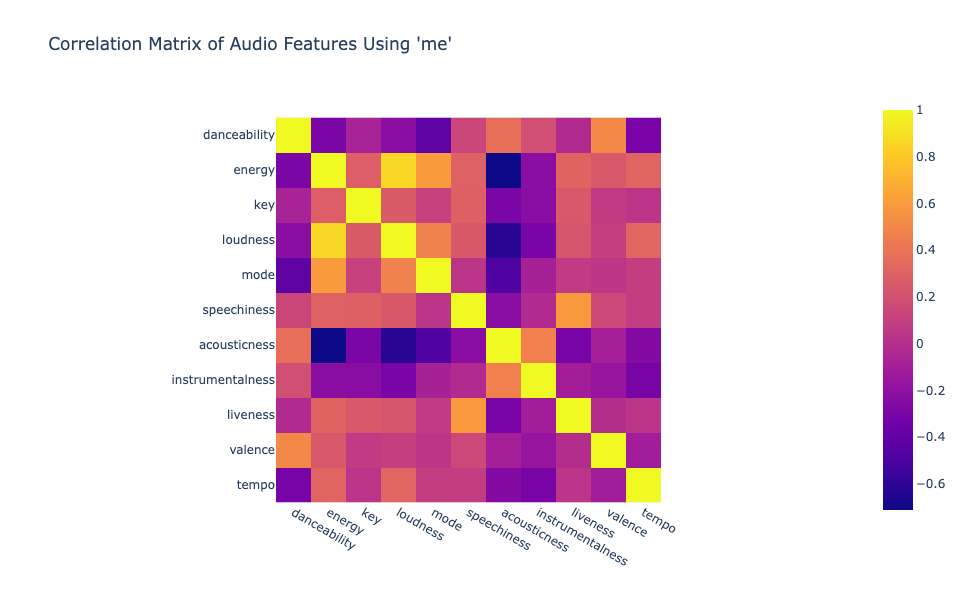

In [75]:
correlation_matrix = me.corr(numeric_only=True)
fig = px.imshow(correlation_matrix,
               title="Correlation Matrix of Audio Features Using 'me'")
fig.update_layout(width=600, height=600)
fig.show()

From these results, I could see that not a lot of the songs in my entire playlist had a particulary strong correlations between Spotify features. There were a few blocks on the matrix where there was definitely a stronger correlation than others, namely:
1. `loudness` & `energy` with a correlation of 0.864
2. `energy` and `mode` with a correlation of 0.598
3. `speechiness` & `liveness` with a correlation of 0.587

This made me intersted in seeing if these correlations were also present in individual dataframes.

I then tested creating a correlation matrix only for my `bob` dataframe:

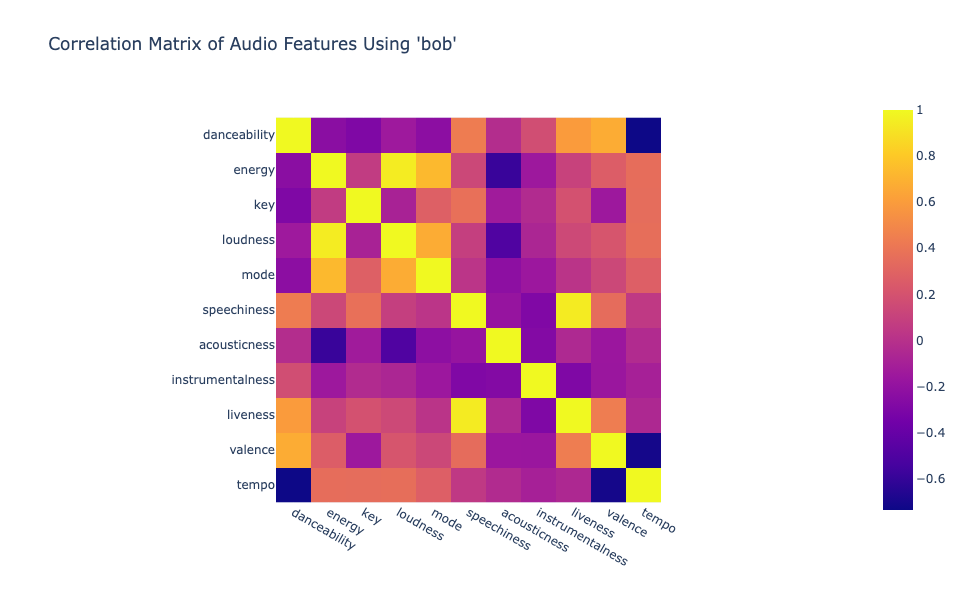

In [76]:
correlation_matrix = bob.corr(numeric_only=True)
figbob = px.imshow(correlation_matrix,
               title="Correlation Matrix of Audio Features Using 'bob'")
figbob.update_layout(width=600, height=600)
figbob.show()

From looking at the correlation matrix for just `bob`, we can see that the highest correlations are consistent with the findings above: 
1. `loudness` & `energy` with a correlation of 0.946
2. `energy` and `mode` with a correlation of 0.73
3. `speechiness` & `liveness` with a correlation of 0.943

Just because I was curious, I checked if there were similar trends for the `keef` and `covers` dataframes. The `keef` dataframe didn't necessarily show as much of a correlation for most intersections of audio features, with the strongest correlation unsurprisi. The `covers` correlation matrix, however, did also show higher correlations for `loudness` & `energy` as well as `energy` and `mode`. 

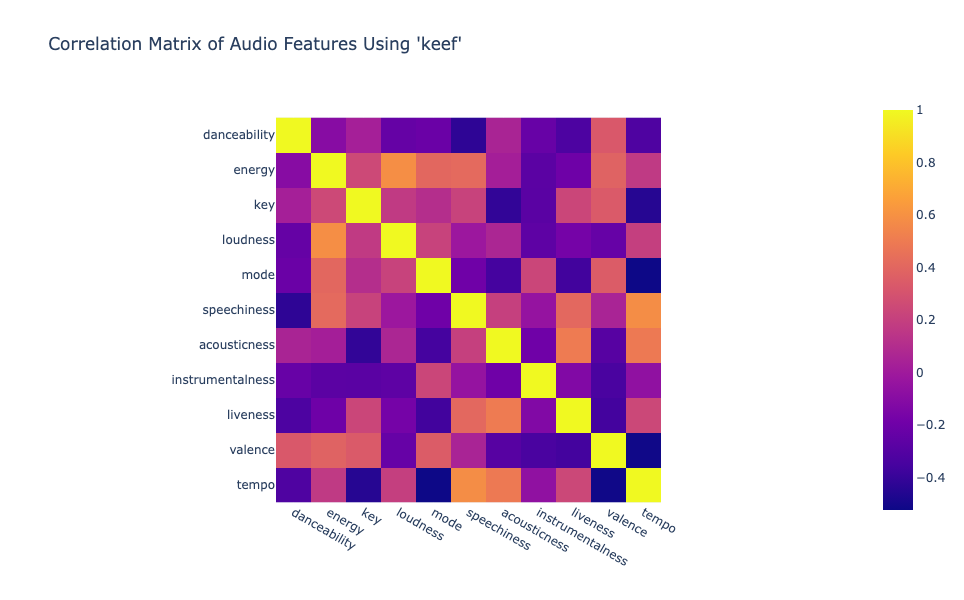

In [77]:
correlation_matrix = keef.corr(numeric_only=True)
fig = px.imshow(correlation_matrix,
               title="Correlation Matrix of Audio Features Using 'keef'")
fig.update_layout(width=600, height=600)
fig.show()

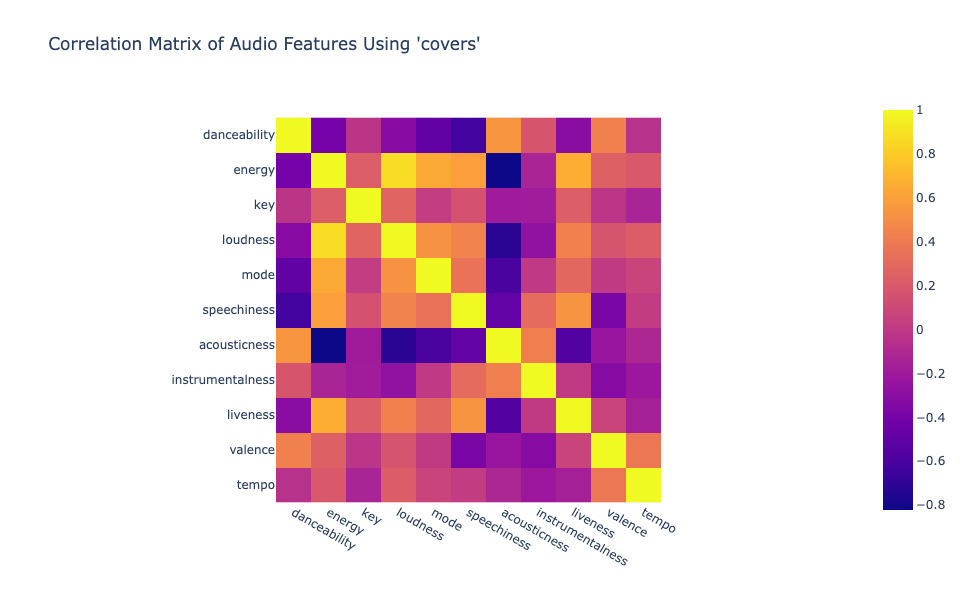

In [78]:
correlation_matrix = covers.corr(numeric_only=True)
fig = px.imshow(correlation_matrix,
               title="Correlation Matrix of Audio Features Using 'covers'")
fig.update_layout(width=600, height=600)
fig.show()

### 2D. Creating correlation scatter plots:

After the previous step, I wanted to look at the relationship between only a few of Spotify's features by making correlations plots for only the following features in this list.

##### FEATURES:
* mode
* energy
* loudness
* speechiness
* liveness
* valence

All the of these features had been part of the stronger correlations, and I added `valence` because I find this measure to be quite flawed. In the case of *Elenor Rigby* by The Beatles (a song about lonely people with hauntingly sad lyrics), Spotify gave it a very high `valence` rating. This is strange since `valence` supposedly meausures "musical positiveness conveyed by a track", where tracks with high valence sound more positive. 

I chose to look at the correlation of these features relating to my `me` data frame. In the following code, I specified which dimensions of the larger correlation matrix I wanted to look at, which were the ones I noted in the bulleted list above:
```python
fig = px.scatter_matrix(me, dimensions=['loudness', 'energy', 'liveness', 'speechiness','mode','valence'],
                                       color = "playlist_title")
```
The `color = playlist_title` allowed me to differentiate between the points on each subplot so I could see which playlist the songs in each subplot belonged to. 

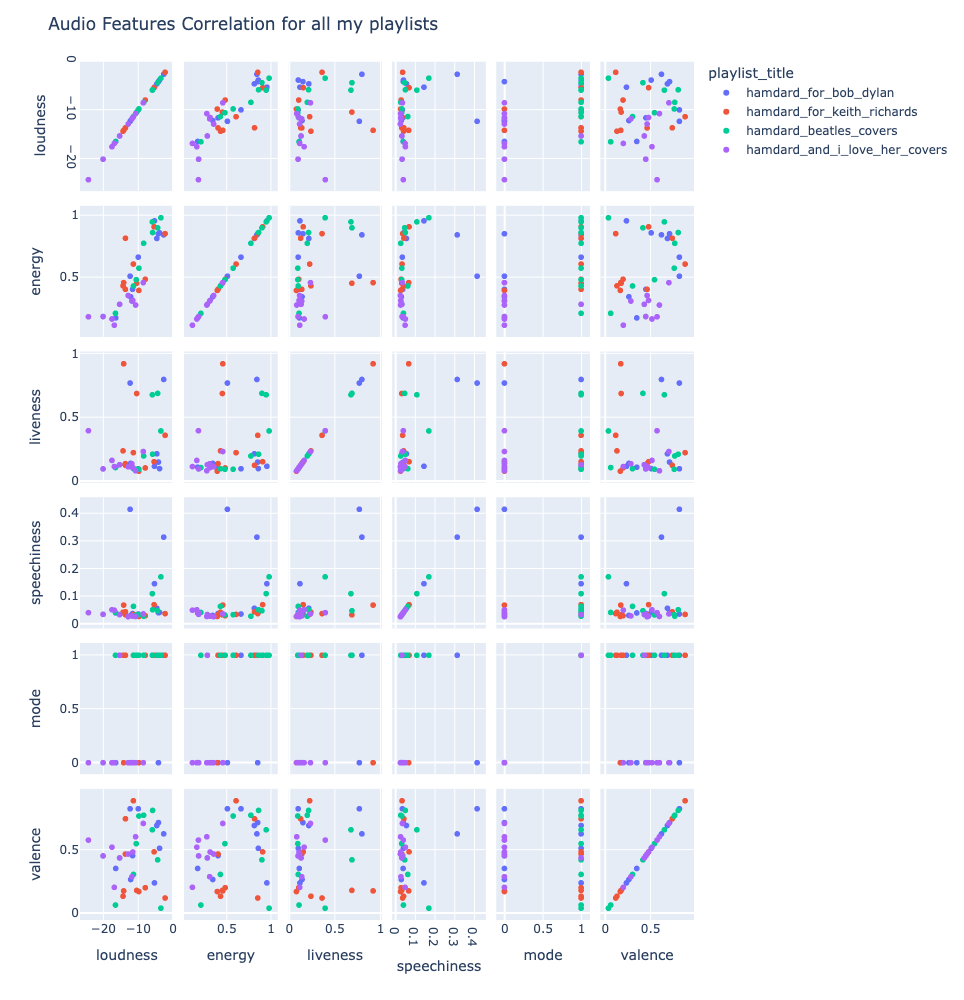

In [79]:
# create matrix (and ignore non-numerical columns if they exist)
correlation_matrix = me.corr(numeric_only=True)

# fig = px.scatter_matrix(correlation_matrix)
fig = px.scatter_matrix(me, dimensions=['loudness', 'energy', 'liveness', 'speechiness','mode','valence'],
                                       color = "playlist_title")
#for mode, minor = 0 and major = 1

fig.update_yaxes(tickangle=90)
fig.update_layout(title=f"Audio Features Correlation for all my playlists")
# adjust size
fig.update_layout(width=1000, height=1000)
fig.show()

After looking at these results, I became more interested in the `mode` feature, which is supposed to indicate the modality (major or minor) of a track, where songs in a major key are represented by 1, and minor keys represented by 0. All of the `mode` correlations essentially have bifurcated the results by assigning 0 or 1 to each song, creating 2 distinct lines. 

Next I wanted to look just at the scatter plot of `mode` vs. `valence` for all my playlists:

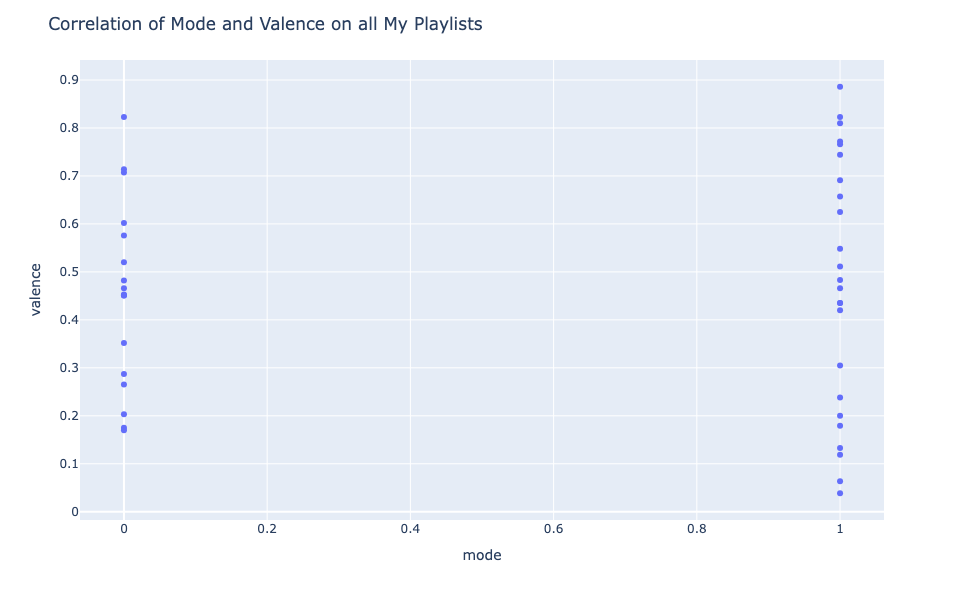

In [80]:
fig = px.scatter(me,
                x='mode', y = 'valence',
                hover_data = ['artist_name', 'track_title'])
fig.update_layout(title="Correlation of Mode and Valence on all My Playlists")
fig.update_layout(width=800, height=600)
fig.show()

I was a bit surprised looking over some of the hover data for this scatter plot. For the most part, I actually think these songs are separated pretty well when it comes to `mode`. I thought it was also intresting to see all of the *And I Love Her* covers, which all contained the same lyrics and music by Lennon and McCartney, to have different listed `valence` values. I'm not surprised Spotify gave all these songs different values for valence, but I want to understand what makes The Beatles Revival Band's cover more "happy" than Santo and Johnny's? Additionally, what made Kurt Cobain's version sound like it was in a major key (it's the only cover where mode=1) compared to the others?

When analyzing the low `valence` & `major` mode songs however, I was surprised to see *Black Sabbath* by Black Sabbath being listed as 1, indicating a major key, although understandable for valence. But seeing Frank Sinatra's cover of *Something* by The Beatles, and Oasis' *I am the Walrus* cover listed as low valence for major key songs, I was honestly a bit shocked because the former is one of the greatest love songs of all time, and the other is a fun song about nonsense. I think just looking at these few songs alone is enough to argue that Spotify's metrics regarding how they measure `valence` and `mode` are questionable. 

### 2E. Creating `mode_0` and `mode_1` and radar plots for each:

Next, I wanted to try and make radar plots of my `me` dataframe, knowing what I know now about the `mode` of these songs. I wanted to see how these two subsets of major vs minor, or mode=0 vs mode=1, compared when looking at other Spotify measures. Essentially, are there any similarities in other features across these songs besides the mode? 

To do this I created 2 smaller data frames `mode_0` & `mode_1`. By setting 
```python
me['mode'] == 0, AND me['mode'] == 1 
```
respectively for each dataframe, I know have one data frame with only songs that have mode=0, and same for mode=1. 

In [81]:
# create a smaller dataframe with only mode = 0
mode_0 = me[me['mode'] == 0]

# create a smaller dataframe with only mode = 1
mode_1 = me[me['mode'] == 1]

In [84]:
mode_0.reset_index(drop=True).head()

,playlist_title,track_title,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,hamdard_for_bob_dylan,Protect Ya Neck_Wu-Tang Clan,Wu-Tang Clan,0.822,0.509,8,-12.310,0,0.4150,0.0353,0.000007,0.771,0.823,102.007
1,hamdard_for_bob_dylan,The Blond-O-Sonic Shimmer Trap_Arctic Monkeys,Arctic Monkeys,0.502,0.852,2,-4.173,0,0.0399,0.1600,0.011300,0.151,0.714,125.052
2,hamdard_for_bob_dylan,Suzanne_Leonard Cohen,Leonard Cohen,0.409,0.172,6,-16.440,0,0.0389,0.9220,0.001120,0.111,0.352,132.151
3,hamdard_for_bob_dylan,Red Right Hand_Nick Cave & The Bad Seeds,Nick Cave & The Bad Seeds,0.735,0.403,4,-11.599,0,0.0370,0.1390,0.473000,0.107,0.453,115.658
4,hamdard_for_bob_dylan,Diamonds And Rust_Joan Baez,Joan Baez,0.506,0.343,5,-12.153,0,0.0300,0.2430,0.000000,0.141,0.265,130.052


In [85]:
mode_1.reset_index(drop=True).head()

,playlist_title,track_title,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,hamdard_for_bob_dylan,Metal Militia (Remastered)_Metallica,Metallica,0.166,0.956,9,-5.307,1,0.1450,0.000081,0.00515,0.1180,0.238,176.217
1,hamdard_for_bob_dylan,Razorblade_The Strokes,The Strokes,0.394,0.859,9,-3.851,1,0.0409,0.002010,0.23300,0.1000,0.511,136.075
2,hamdard_for_bob_dylan,Rap God_Eminem,Eminem,0.709,0.843,7,-2.660,1,0.3140,0.395000,0.00000,0.7990,0.625,148.134
3,hamdard_for_bob_dylan,My Doorbell_The White Stripes,The White Stripes,0.614,0.663,8,-9.965,1,0.0352,0.290000,0.00682,0.0986,0.823,97.083
4,hamdard_for_bob_dylan,Figure It Out_Royal Blood,Royal Blood,0.658,0.814,0,-4.631,1,0.0559,0.229000,0.00653,0.2160,0.691,108.018


To remind myself of all the different columns we have in the dataframes, I just chose to look at the original `me` data to see all the Spotify features using `.iloc`:

In [86]:
me.iloc[0]

playlist_title                     hamdard_for_bob_dylan
track_title         Metal Militia (Remastered)_Metallica
artist_name                                    Metallica
danceability                                       0.166
energy                                             0.956
key                                                    9
loudness                                          -5.307
mode                                                   1
speechiness                                        0.145
acousticness                                    0.000081
instrumentalness                                 0.00515
liveness                                           0.118
valence                                            0.238
tempo                                            176.217
Name: 0, dtype: object

Next I wanted to see how the radar plots of `mode_0` and `mode_1` compared. I decided to look at all the the features besides `mode` for the songs in each dataframe and see how the compared. For these plots, I left out `valence` because I am still skeptical of Spotify's metrics regarding this feature, and I left out `key` and `loudness` because they both had scales that were not from 0 to 1 like the others:

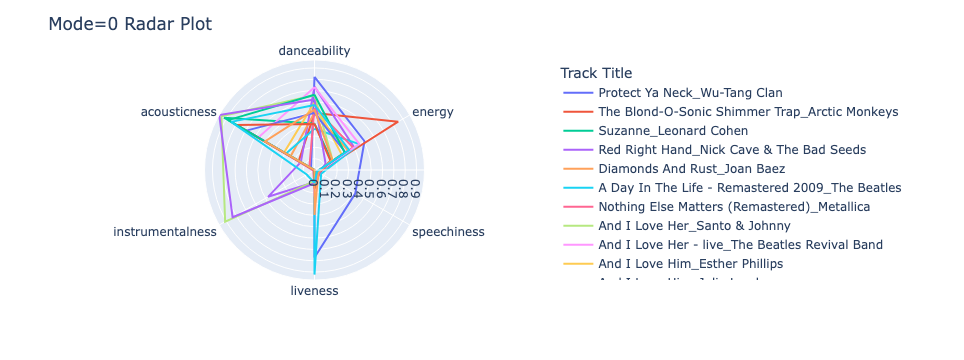

In [99]:
feature_list = ["danceability", "energy","speechiness","liveness", \
                "instrumentalness",'acousticness']
spotify_tools.audio_feature_radar(mode_0, feature_list, "Mode=0 Radar Plot")

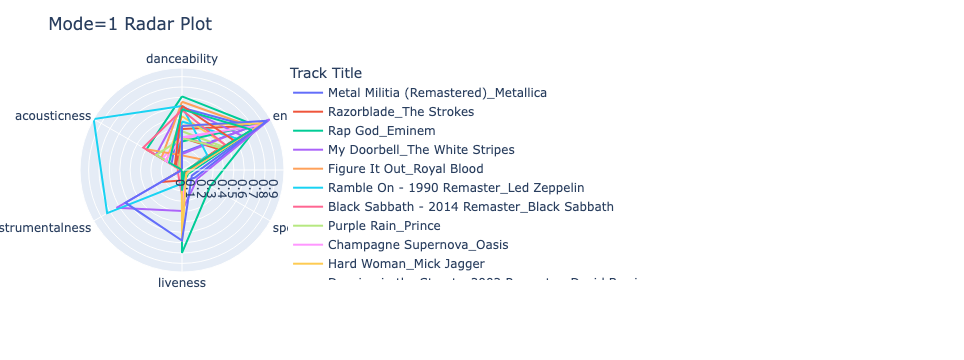

In [100]:
feature_list = ["danceability", "energy","speechiness","liveness", \
                "instrumentalness", 'acousticness']
spotify_tools.audio_feature_radar(mode_1, feature_list, "Mode=1 Radar Plot")

Looking at these results from Spotify's data, it looks as though minor key, or `mode_0`, songs are more likely to have the qualities of `acousticness`, tend not to have as much `energy`, and with few exceptions, do not have much `liveliness` and `speechiness`. 

On the other hand, most of the major key or `mode_1` have more `energy` and a mid-range level of `danceability`. These songs, with the exception of Kurt Cobain's *And I Love Her* cover, also seem to have a much lower level of `acousticness`, `instrumentalness` and `speechiness`. 

Overall, I think this isn't the the most perfect measurement of the qualities of each song, but I would agree that with this dataset, the songs are for the most part categorically placed in into groups that make sense. I think the most accurate feature that was measured, as someone who has actaully listened to all these songs, was the `energy` feature. I do think because so many of the songs included were the *And I Love Her* covers I included in the `covers` dataframe, they all got grouped into the `mode_0` dataframe (except Kurt Cobain's cover somehow), significantly lowering the energy for that group. I think these radar plots were a very cool and useful tool for seeing the overall vibe of thsese playlists, and give a general sense of what from listening to these groups of songs. 

# 3. Interpretation



I think I explained a lot of my findings in the implementation sections, but my general interpretation of my findings is that Spotify's data is very useful for getting a gerneal overview of what to expect from certain songs contained within certain playlists. I still am skeptical and unsure about how exaclty Spotify collects the data from these songs and creates their metrics for each audio feature, but I think looking at the radar plots, I'm starting to think that perhaps their categorization isn't all that bad. I think there were some obvious outliers for songs that may have just been categorized incorrectly, for me namely Kurt Cobain's *And I Love Her* cover, but otherwise I think the findings of my radar plot made a bit of sense. I think most people would agree that songs in a major key tend to be more energetic and danceable while songs in a minor key are the opposite. While that's not entirely true, you could argue that my data shows supports this. My biggest takeaway besides looking at the Spotify features was that the plotly.express tools are great for visualizing data. They were very colorful and fun to work with, and I enjoyed how each type of graph I made using these tools were interactive. In the future I hope I can move on to using th

# 4.  Bibliography

Freedman, Richard. *Charts and Plots with Plotly Express*. GitHub. https://github.com/RichardFreedman/Encoding_Music/blob/main/01_Tutorials/06_Pandas_Tidy_Data.md 

Freedman, Richard. *Encoding Music Notebook Model Homework Report*. GitHub.
    https://github.com/RichardFreedman/music_style_guide/blob/main/M255_Notebook_Style_Guide.md

Spotify for Developers. *Web API* https://developer.spotify.com/documentation/web-api/reference/get-audio-features.


In [56]:
alt.renderers.enable('default')
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"